In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from functions import *

In [2]:
board = cv2.imread('cropped/1.jpg')
board = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)


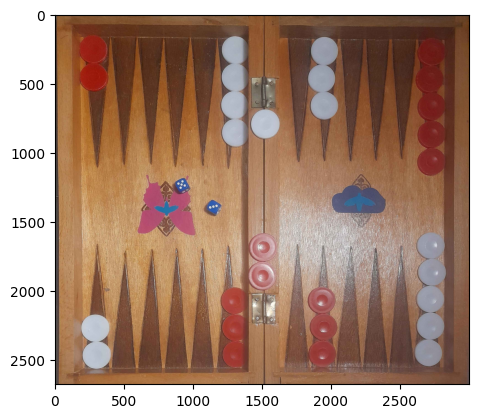

(2680, 3000, 3)

In [3]:
plt.imshow(board)
plt.show()
board.shape

In [124]:
board_ = np.array(board)
board_ = cv2.resize(board_, (1000,1000))

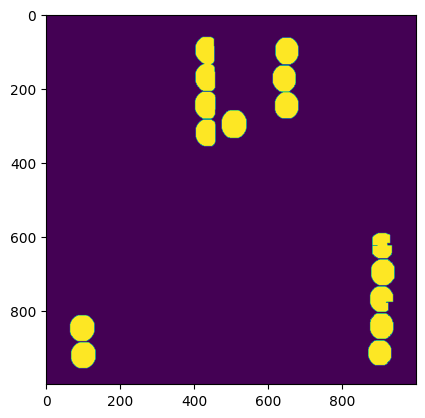

In [102]:
epsilon = 130
white_upper_range = np.array([255,255,255])
white_lower_range = white_upper_range - epsilon

k = np.ones((11,11))
whitemask = cv2.inRange(board_, white_lower_range, white_upper_range)
whitemask = cv2.erode(whitemask, k)
whitemask = cv2.erode(whitemask, k)
whitemask = cv2.dilate(whitemask ,k)
whitemask = cv2.dilate(whitemask ,k)

plt.imshow(whitemask)
plt.show()

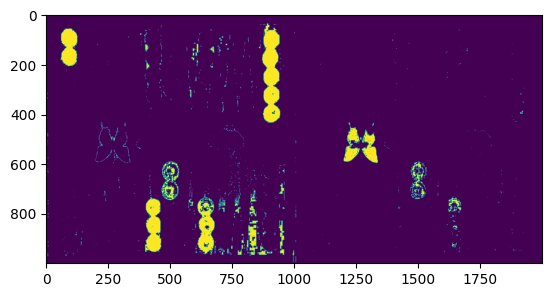

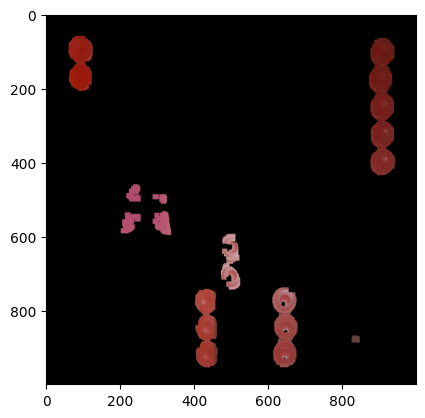

In [ ]:
img_hsv=cv2.cvtColor(board_, cv2.COLOR_RGB2HSV)

k = np.ones((5,5))
# lower mask (0-10)
lb = 50
lower_red = np.array([0,lb,lb])
upper_red = np.array([4,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,lb,lb])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

plt.imshow(np.concatenate([mask0, mask1], axis=1))
plt.show()

# join my masks
mask = mask0+mask1
mask = cv2.erode(mask, k)
mask = cv2.erode(mask, k)
mask = cv2.erode(mask, k)
mask = cv2.dilate(mask, k)
mask = cv2.dilate(mask, k)
mask = cv2.dilate(mask, k)

output_img = board_.copy()
output_img[np.where(mask==0)] = 0

plt.imshow(output_img)
plt.show()

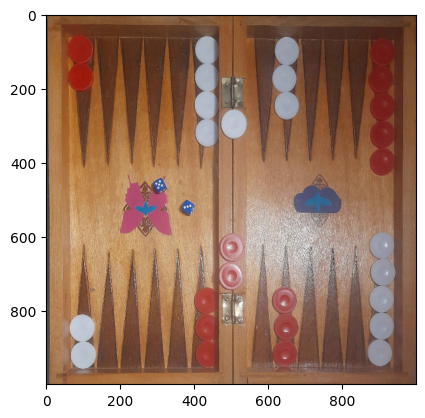

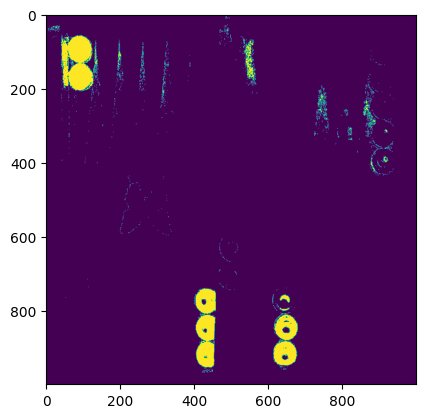

In [145]:
epsilon_red = 120
epsilon_other = 80
red_upper_range = np.array([255,epsilon_other,epsilon_other])
red_lower_range = np.array([255-epsilon_red,0,0])

lower_red = np.array([0,40,40])
upper_red = np.array([150,255,255])
without_red = cv2.inRange(board_, lower_red, upper_red)
board_red = np.array(board_)
board_red[without_red==255] = 0

plt.imshow(board_red)
plt.show()

redmask = cv2.inRange(board_, red_lower_range, red_upper_range)

plt.imshow(redmask)
plt.show()

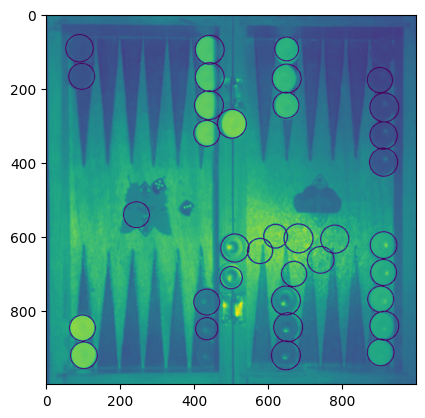

In [ ]:
#detect pawns

minDist = 50
param1 = 30 #500
param2 = 15 #200 #smaller value-> more false circles
minRadius = 30
maxRadius = 40 #10


board_ = cv2.GaussianBlur(board_, (5,5),0)
board_ = cv2.blur(board_, (5,5))

circles = cv2.HoughCircles(board_,cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(board_, (i[0], i[1]), i[2], (0, 255, 0), 2)

# Show result for testing:
plt.imshow(board_)
plt.show()

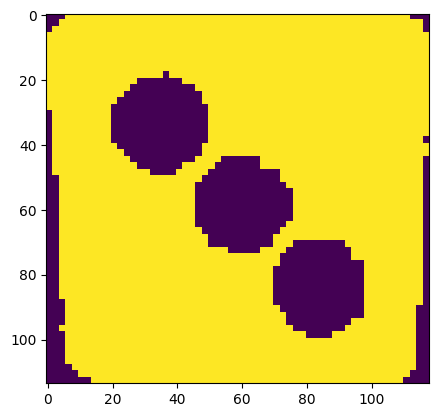

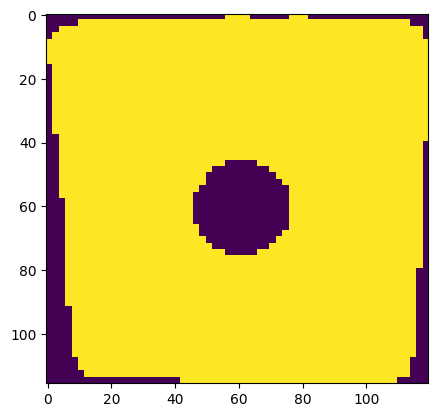

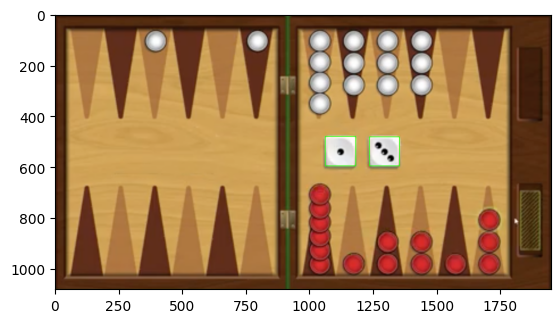

In [5]:
#detect dice

board_ = np.array(board)
mask = cv2.inRange(board_, (200,200,200), (255,255,255))
cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


dices = []
min_area = 10000
max_area = 20000
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        dices.append(mask[y:y+h, x:x+w])
        cv2.rectangle(board_, (x, y), (x + w, y + h), (36,255,12), 2)

detector = cv2.SimpleBlobDetector()
for dice in dices:
    plt.imshow(dice)
    plt.show()
    #blobs = detector.detect(dice)
    # im_with_keypoints = cv2.drawKeypoints(board_, blobs, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # plt.imshow(im_with_keypoints)
    # plt.show()

plt.imshow(board_)
plt.show()